# Ml Based Regression to Model Insurance Premium

In [1]:
#!pip install arff 

import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 

In [2]:
import arff
data_freq = arff.load('freMTPL2freq.arff') 
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower", "VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])
df_freq.head()
df_freq.info()
df_freq.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  float64
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  float64
 5   VehAge      678013 non-null  float64
 6   DrivAge     678013 non-null  float64
 7   BonusMalus  678013 non-null  float64
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  float64
 11  Region      678013 non-null  object 
dtypes: float64(8), object(4)
memory usage: 62.1+ MB


,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


## Check Duplicates for IDpol in df_freq

In [3]:
duplicates = df_freq[df_freq.duplicated(subset=['IDpol'], keep=False)]
print(duplicates.head())

Empty DataFrame
Columns: [IDpol, ClaimNb, Exposure, Area, VehPower, VehAge, DrivAge, BonusMalus, VehBrand, VehGas, Density, Region]
Index: []


In [4]:
data_sev = arff.load('freMTPL2sev.arff') 
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "PurePremium"])
df_sev.head()
df_sev.info()
df_sev.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  float64
 1   PurePremium  26639 non-null  float64
dtypes: float64(2)
memory usage: 416.4 KB


,IDpol,PurePremium
count,2.663900e+04,2.663900e+04
mean,2.279864e+06,2.278536e+03
std,1.577202e+06,2.929748e+04
min,1.390000e+02,1.000000e+00
25%,1.087642e+06,6.868100e+02
50%,2.137413e+06,1.172000e+03
75%,3.180162e+06,1.228080e+03
max,6.113971e+06,4.075401e+06


## Check Duplicates or multiple IDpol in data_sev

In [5]:
duplicates = df_sev[df_sev.duplicated(subset=['IDpol'], keep=False)]
print(duplicates.head())
duplicates.info()
## I see 3068 rows of duplicates

        IDpol  PurePremium
0      1552.0       995.20
7   4020812.0     54942.62
8   4020812.0      7620.00
22  4002743.0       556.14
23  4002743.0      1204.00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3068 entries, 0 to 26636
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        3068 non-null   float64
 1   PurePremium  3068 non-null   float64
dtypes: float64(2)
memory usage: 71.9 KB


### There are 3068 entries that have multiple claims 

In [6]:
print(duplicates.head())

        IDpol  PurePremium
0      1552.0       995.20
7   4020812.0     54942.62
8   4020812.0      7620.00
22  4002743.0       556.14
23  4002743.0      1204.00


### Calculating Sum of 'PurePremium' for each 'IDpol' (Using Group By)

In [7]:

df_sev_updated = df_sev.groupby('IDpol')['PurePremium'].sum().reset_index()
# 24950 rows × 2 columns

In [8]:
# Perform an inner Join to merge the two dataframes
inner_join_df = pd.merge(df_freq, df_sev_updated, on='IDpol', how='inner')

In [9]:
combined_df = inner_join_df.copy()

print(combined_df.info())
combined_df.head()
combined_df.info()
combined_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24944 entries, 0 to 24943
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        24944 non-null  float64
 1   ClaimNb      24944 non-null  float64
 2   Exposure     24944 non-null  float64
 3   Area         24944 non-null  object 
 4   VehPower     24944 non-null  float64
 5   VehAge       24944 non-null  float64
 6   DrivAge      24944 non-null  float64
 7   BonusMalus   24944 non-null  float64
 8   VehBrand     24944 non-null  object 
 9   VehGas       24944 non-null  object 
 10  Density      24944 non-null  float64
 11  Region       24944 non-null  object 
 12  PurePremium  24944 non-null  float64
dtypes: float64(9), object(4)
memory usage: 2.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24944 entries, 0 to 24943
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol 

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,PurePremium
count,2.494400e+04,24944.000000,24944.000000,24944.000000,24944.000000,24944.000000,24944.000000,24944.000000,2.494400e+04
mean,2.262558e+06,1.060175,0.692669,6.468970,7.386225,45.139793,64.930164,1984.306166,2.401749e+03
std,1.578475e+06,0.289929,0.313969,2.012848,5.173621,14.658487,19.864719,4119.719566,3.026475e+04
min,1.390000e+02,1.000000,0.002740,4.000000,0.000000,18.000000,50.000000,2.000000,1.000000e+00
25%,1.082690e+06,1.000000,0.450000,5.000000,3.000000,34.000000,50.000000,111.000000,7.497875e+02
50%,2.130098e+06,1.000000,0.760000,6.000000,7.000000,45.000000,55.000000,495.000000,1.172000e+03
75%,3.178542e+06,1.000000,1.000000,7.000000,11.000000,54.000000,76.000000,2120.000000,1.346400e+03
max,6.113971e+06,16.000000,2.000000,15.000000,99.000000,99.000000,228.000000,27000.000000,4.075401e+06


In [10]:
# Create the new column "PurePremium" by dividing "PurePremium" by "Exposure"
combined_df['PurePremium'] = combined_df['PurePremium'] / combined_df['Exposure']

In [11]:
# Create the new column "Frequency" by dividing "ClaimNb" by "Exposure"
combined_df['Frequency'] = combined_df['ClaimNb'] / combined_df['Exposure']

In [12]:
# Remove the columns 
combined_df.pop('IDpol')
combined_df.pop('ClaimNb')
combined_df.pop('Exposure')

0        0.75
1        0.14
2        0.14
3        0.62
4        0.31
         ... 
24939    0.18
24940    0.14
24941    0.17
24942    0.17
24943    0.13
Name: Exposure, Length: 24944, dtype: float64

In [13]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24944 entries, 0 to 24943
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         24944 non-null  object 
 1   VehPower     24944 non-null  float64
 2   VehAge       24944 non-null  float64
 3   DrivAge      24944 non-null  float64
 4   BonusMalus   24944 non-null  float64
 5   VehBrand     24944 non-null  object 
 6   VehGas       24944 non-null  object 
 7   Density      24944 non-null  float64
 8   Region       24944 non-null  object 
 9   PurePremium  24944 non-null  float64
 10  Frequency    24944 non-null  float64
dtypes: float64(7), object(4)
memory usage: 2.3+ MB


In [14]:
y_premium_column = combined_df.pop('PurePremium')
combined_df['PurePremium'] = y_premium_column

In [15]:
print("Missing values:\n", combined_df.isnull().sum())

Missing values:
 Area           0
VehPower       0
VehAge         0
DrivAge        0
BonusMalus     0
VehBrand       0
VehGas         0
Density        0
Region         0
Frequency      0
PurePremium    0
dtype: int64


In [16]:
import numpy as np

# Calculate the Z-score for 'PurePremium' column
z_scores = np.abs((combined_df['PurePremium'] - combined_df['PurePremium'].mean()) / combined_df['PurePremium'].std())

# Define the threshold for outliers (e.g., Z-score greater than 3)
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Create a DataFrame containing only the outliers
df_outliers = combined_df.iloc[outlier_indices]

df_scaled_cleaned = combined_df.drop(outlier_indices)

combined_df = df_scaled_cleaned.copy()
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24899 entries, 0 to 24943
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         24899 non-null  object 
 1   VehPower     24899 non-null  float64
 2   VehAge       24899 non-null  float64
 3   DrivAge      24899 non-null  float64
 4   BonusMalus   24899 non-null  float64
 5   VehBrand     24899 non-null  object 
 6   VehGas       24899 non-null  object 
 7   Density      24899 non-null  float64
 8   Region       24899 non-null  object 
 9   Frequency    24899 non-null  float64
 10  PurePremium  24899 non-null  float64
dtypes: float64(7), object(4)
memory usage: 2.3+ MB


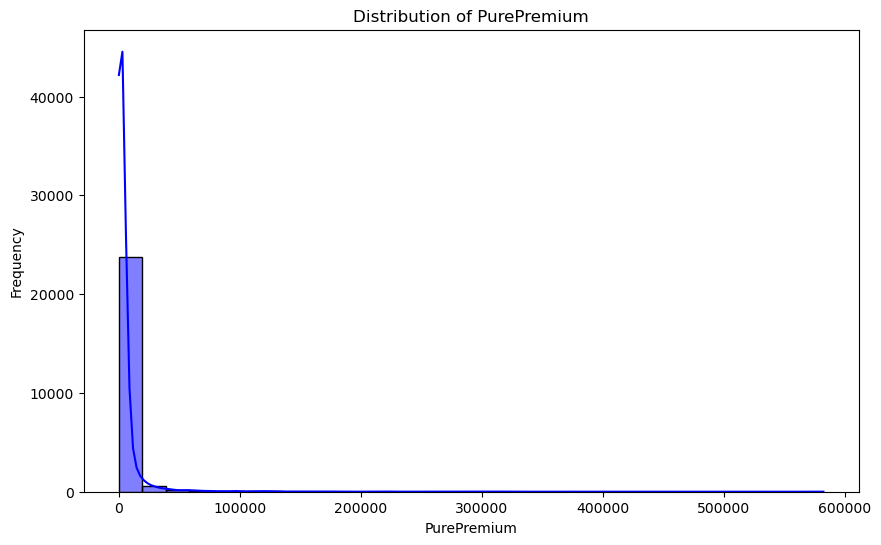

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'PurePremium'
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['PurePremium'], bins=30, kde=True, color='blue')
plt.title('Distribution of PurePremium')
plt.xlabel('PurePremium')
plt.ylabel('Frequency')
plt.show()

           VehPower        VehAge       DrivAge    BonusMalus       Density  \
count  24899.000000  24899.000000  24899.000000  24899.000000  24899.000000   
mean       6.469577      7.384554     45.150649     64.917708   1983.996546   
std        2.013247      5.173428     14.651704     19.856510   4119.451746   
min        4.000000      0.000000     18.000000     50.000000      2.000000   
25%        5.000000      3.000000     34.000000     50.000000    111.000000   
50%        6.000000      7.000000     45.000000     55.000000    493.000000   
75%        7.000000     11.000000     54.000000     76.000000   2120.000000   
max       15.000000     99.000000     99.000000    228.000000  27000.000000   

          Frequency   PurePremium  
count  24899.000000  24899.000000  
mean       3.108355      7.441633  
std        9.106552      1.400259  
min        0.500000      0.000000  
25%        1.000000      7.028201  
50%        1.351351      7.315990  
75%        2.409639      8.115056  


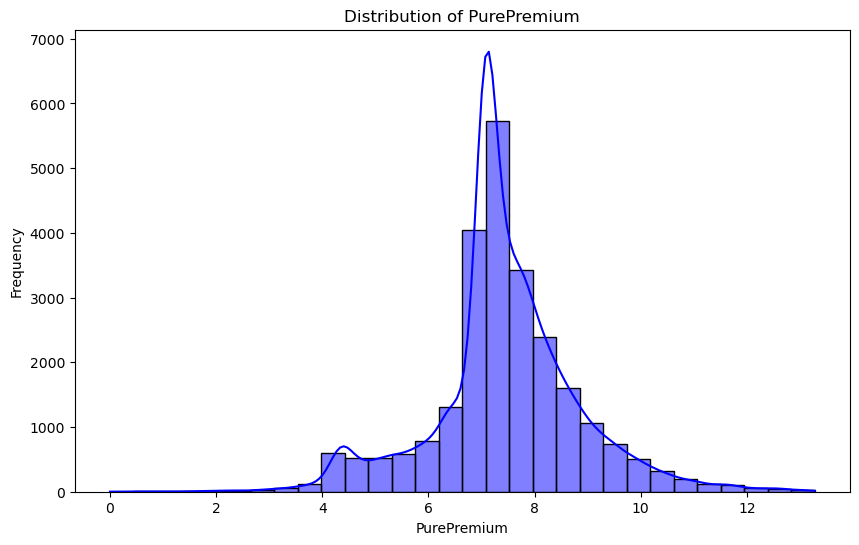

In [18]:
# Log transform the 'PurePremium' column

combined_df['PurePremium'] = np.log(combined_df['PurePremium'])

print(combined_df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(combined_df['PurePremium'], bins=30, kde=True, color='blue')
plt.title('Distribution of PurePremium')
plt.xlabel('PurePremium')
plt.ylabel('Frequency')
plt.show()

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Features to be Normalised
numerical_features = ['Frequency', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']

# Features to be encoded
columns_to_encode = ['Area', 'VehBrand', 'VehGas', 'Region']

# Copy the DataFrame to avoid modifying the original
data = combined_df.copy()

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())                     # Scale the features
])

# Apply the pipeline to numerical features
data[numerical_features] = pipeline.fit_transform(data[numerical_features])

# Apply one-hot encoding
data = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)


y_premium_column = data.pop('PurePremium')
data['PurePremium'] = y_premium_column

df = data.copy()
df.info()
df.describe()
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24899 entries, 0 to 24943
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VehPower        24899 non-null  float64
 1   VehAge          24899 non-null  float64
 2   DrivAge         24899 non-null  float64
 3   BonusMalus      24899 non-null  float64
 4   Density         24899 non-null  float64
 5   Frequency       24899 non-null  float64
 6   Area_'B'        24899 non-null  uint8  
 7   Area_'C'        24899 non-null  uint8  
 8   Area_'D'        24899 non-null  uint8  
 9   Area_'E'        24899 non-null  uint8  
 10  Area_'F'        24899 non-null  uint8  
 11  VehBrand_'B10'  24899 non-null  uint8  
 12  VehBrand_'B11'  24899 non-null  uint8  
 13  VehBrand_'B12'  24899 non-null  uint8  
 14  VehBrand_'B13'  24899 non-null  uint8  
 15  VehBrand_'B14'  24899 non-null  uint8  
 16  VehBrand_'B2'   24899 non-null  uint8  
 17  VehBrand_'B3'   24899 non-null 

In [20]:
## Understand std deviation of features
column_std = df.std()
print(column_std)

VehPower          1.000020
VehAge            1.000020
DrivAge           1.000020
BonusMalus        1.000020
Density           1.000020
Frequency         1.000020
Area_'B'          0.301611
Area_'C'          0.443912
Area_'D'          0.428386
Area_'E'          0.419760
Area_'F'          0.166670
VehBrand_'B10'    0.168925
VehBrand_'B11'    0.156314
VehBrand_'B12'    0.360399
VehBrand_'B13'    0.141783
VehBrand_'B14'    0.071238
VehBrand_'B2'     0.438671
VehBrand_'B3'     0.289332
VehBrand_'B4'     0.200890
VehBrand_'B5'     0.243787
VehBrand_'B6'     0.213247
VehGas_Regular    0.499924
Region_'R21'      0.052570
Region_'R22'      0.109285
Region_'R23'      0.091235
Region_'R24'      0.433605
Region_'R25'      0.129979
Region_'R26'      0.114018
Region_'R31'      0.183635
Region_'R41'      0.133363
Region_'R42'      0.057641
Region_'R43'      0.037997
Region_'R52'      0.237422
Region_'R53'      0.258445
Region_'R54'      0.172463
Region_'R72'      0.194927
Region_'R73'      0.117727
R

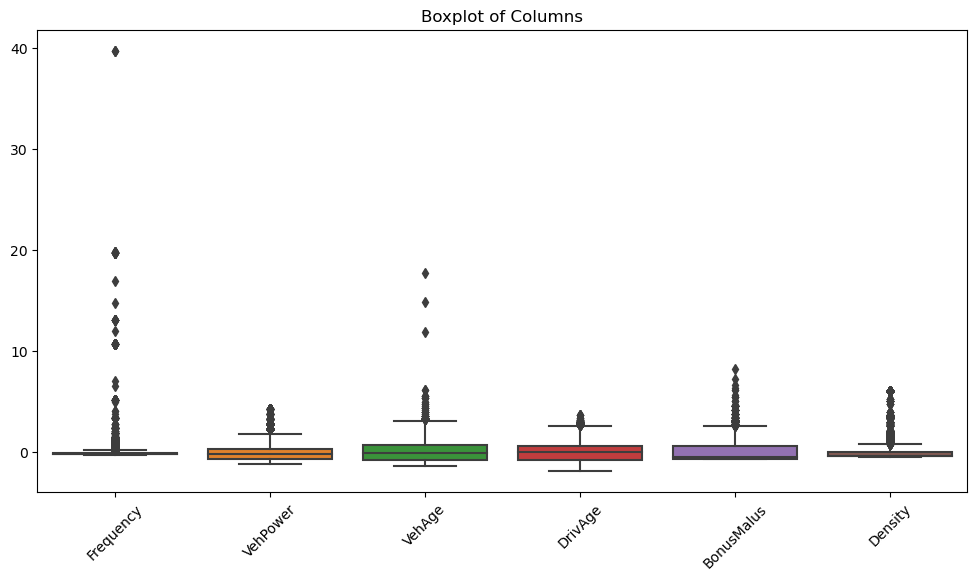

Indices of Outliers: {0, 1, 2, 3, 16392, 11, 15, 16400, 16399, 18, 19, 20, 21, 16407, 24, 16408, 27, 16412, 29, 30, 31, 32, 16417, 34, 16420, 16421, 16422, 39, 16426, 16427, 44, 45, 16430, 47, 48, 51, 16435, 16437, 16438, 54, 16440, 57, 58, 59, 16444, 16445, 62, 16447, 64, 16451, 69, 16454, 16455, 73, 16457, 76, 77, 78, 79, 16460, 16468, 89, 90, 91, 92, 93, 94, 95, 16473, 16482, 16484, 16485, 103, 108, 16506, 16510, 127, 16518, 135, 16519, 137, 138, 140, 16529, 16530, 148, 16532, 16540, 157, 162, 16548, 165, 16551, 16554, 177, 16563, 183, 186, 16570, 16573, 16577, 16579, 197, 198, 204, 207, 16600, 16614, 16615, 16620, 16621, 241, 243, 16629, 256, 16642, 16644, 16645, 16647, 16651, 268, 269, 16658, 16662, 279, 286, 16670, 16671, 16672, 16673, 16674, 16677, 294, 300, 16693, 311, 16696, 16697, 316, 317, 16703, 16704, 16707, 327, 16712, 332, 16716, 334, 16720, 16721, 16723, 16727, 16729, 16730, 16737, 355, 16741, 16742, 16743, 361, 362, 16750, 366, 16753, 372, 16756, 16759, 16760, 377, 378

In [21]:
# Removing Outliers from numerical features
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
columns_of_interest = ['Frequency', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']

# Step 1: Boxplot Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_of_interest])
plt.title('Boxplot of Columns')
plt.xticks(rotation=45)
plt.show()

# Step 2: Z-Score Method
from scipy import stats

z_scores = np.abs(stats.zscore(df[columns_of_interest]))
threshold = 3
outliers_z = np.where(z_scores > threshold)

# Step 3: IQR Method
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)

# Combine results
outliers = set(outliers_z[0]) | set(outliers_iqr.index[outliers_iqr])

print("Indices of Outliers:", outliers)

# Remove outliers identified by IQR method
df_no_outliers_iqr = df[~outliers_iqr]
df = df_no_outliers_iqr.copy()



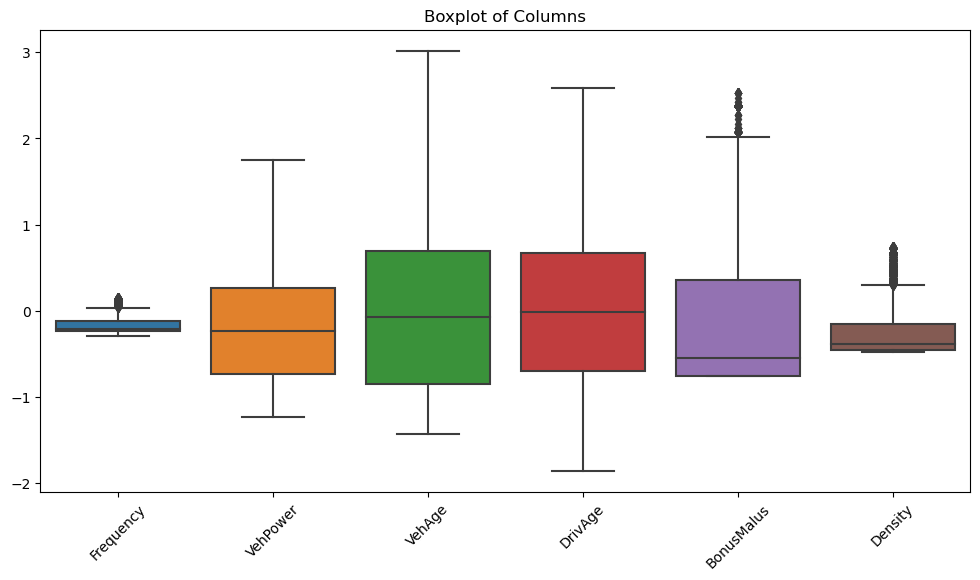

In [22]:
# After removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_of_interest])
plt.title('Boxplot of Columns')
plt.xticks(rotation=45)
plt.show()

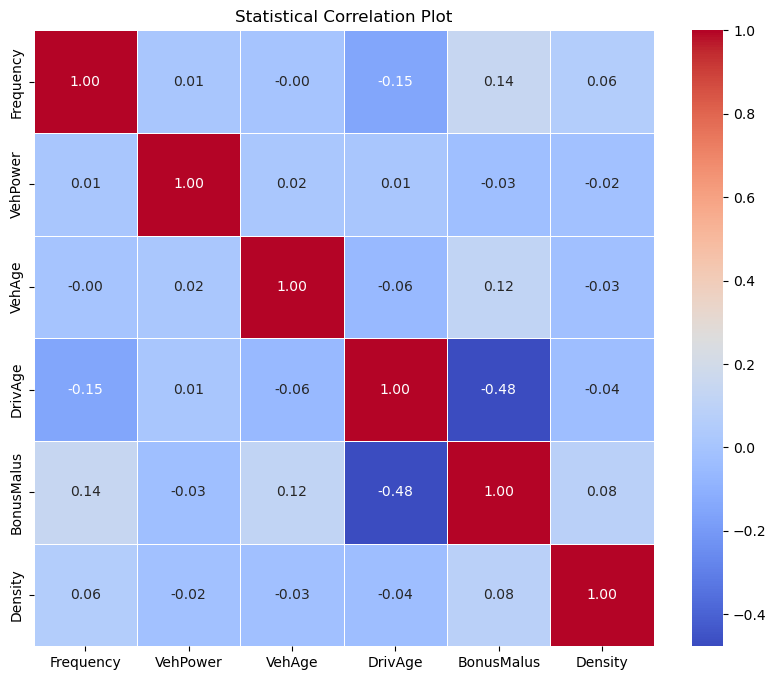

In [23]:
# Find Correlations in Numerical Features

columns_of_interest = ['Frequency', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']
correlation_matrix = df[columns_of_interest].corr()

# Plotting correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Statistical Correlation Plot')
plt.show()

# Light GBM with Hyper Parameter Tuning

In [49]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

# Splitting the data into training, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=0)

# Using numpy to create arrays of labels and features
y_train_PurePremium = np.array(train_df['PurePremium'])
y_val_PurePremium = np.array(val_df['PurePremium'])
y_test_PurePremium = np.array(test_df['PurePremium'])
train_features = np.array(train_df.iloc[:, 0:43])
val_features = np.array(val_df.iloc[:, 0:43])
test_features = np.array(test_df.iloc[:, 0:43])

# Define hyperparameter grid for RandomizedSearchCV
param_grid = {
    'boosting_type': ['gbdt'],
    'objective': ['regression'],
    'metric': ['mae'],  # Changed from 'rmse' to 'mae'
    'num_leaves': [5, 10, 15],  # Refined values
    'learning_rate': [0.01, 0.03, 0.05],  # Refined values
    'feature_fraction': [0.7, 0.8],  # Modified values
    'bagging_fraction': [0.6, 0.7, 0.8],  # Modified values
    'bagging_freq': [5, 7, 10],  # Modified values
    'reg_alpha': [0, 0.1, 0.5]  # Regularization parameter added
}

# Create a LightGBM regressor
lgb_reg = lgb.LGBMRegressor()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=lgb_reg, param_distributions=param_grid, 
                                   n_iter=50, scoring='neg_mean_squared_error', cv=5, 
                                   verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the training data
random_search.fit(train_features, y_train_PurePremium)

# Get the best estimator and its hyperparameters
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)

# Predictions on the validation set using the best estimator
y_pred_val = best_estimator.predict(val_features)

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(y_val_PurePremium, y_pred_val)
mse_val = mean_squared_error(y_val_PurePremium, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val_PurePremium, y_pred_val)
medae_val = median_absolute_error(y_val_PurePremium, y_pred_val)
explained_var_val = explained_variance_score(y_val_PurePremium, y_pred_val)

print("\nValidation Error Metrics:")
print("Mean Absolute Error:", mae_val)
print("Mean Squared Error:", mse_val)
print("Root Mean Squared Error:", rmse_val)
print("R-squared:", r2_val)
print("Median Absolute Error:", medae_val)
print("Explained Variance Score:", explained_var_val)

# Predictions on the test set using the best estimator
y_pred_test = best_estimator.predict(test_features)

# Calculate evaluation metrics for test set
mae_test = mean_absolute_error(y_test_PurePremium, y_pred_test)
mse_test = mean_squared_error(y_test_PurePremium, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_PurePremium, y_pred_test)
medae_test = median_absolute_error(y_test_PurePremium, y_pred_test)
explained_var_test = explained_variance_score(y_test_PurePremium, y_pred_test)

print("\nTesting Error Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r2_test)
print("Median Absolute Error:", medae_test)
print("Explained Variance Score:", explained_var_test)

# Predictions on the training set using the best estimator
y_pred_train = best_estimator.predict(train_features)

# Calculate evaluation metrics for training set
mae_train = mean_absolute_error(y_train_PurePremium, y_pred_train)
mse_train = mean_squared_error(y_train_PurePremium, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_PurePremium, y_pred_train)
medae_train = median_absolute_error(y_train_PurePremium, y_pred_train)
explained_var_train = explained_variance_score(y_train_PurePremium, y_pred_train)

print("\nTraining Error Metrics:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("R-squared:", r2_train)
print("Median Absolute Error:", medae_train)
print("Explained Variance Score:", explained_var_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
Best Hyperparameters: {'reg_alpha': 0.1, 'objective': 'regression', 'num_leaves': 5, 'metric': 'mae', 'learning_rate': 0.05, 'feature_fraction': 0.8, 'boosting_type': 'gbdt', 'bagging_freq': 7, 'bagging_fraction': 0.7}

Validation Error Metrics:
Mean Absolute Error: 0.7541029043801328
Mean Squared Error: 1.243941033297969
Root Mean Squared Error: 1.1153210449453417
R-squared: 0.18067780120827082
Median Absolute Error: 0.40896350920977165
Explained Variance Score: 0.18068215559822787

Testing Error Metrics:
Mean Absolute Error: 0.7213166391860771
Mean Squared Error: 1.176532678995961

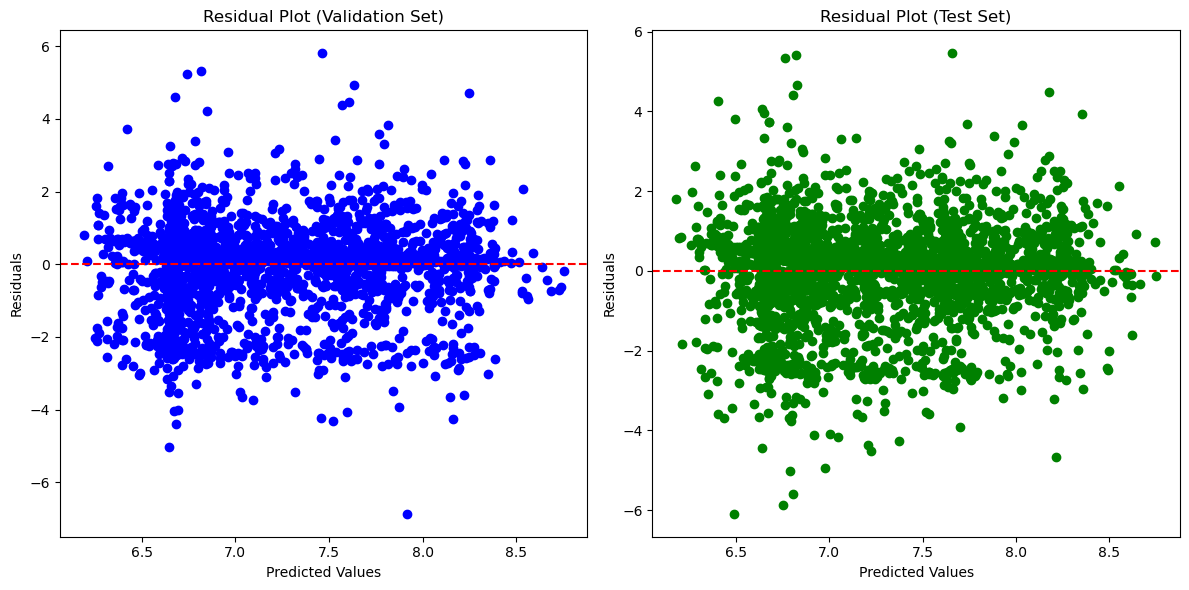

In [50]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals_val = y_val_PurePremium - y_pred_val
residuals_test = y_test_PurePremium - y_pred_test

# Plot residual plots for validation and test sets
plt.figure(figsize=(12, 6))

# Validation set
plt.subplot(1, 2, 1)
plt.scatter(y_pred_val, residuals_val, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Validation Set)')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, residuals_test, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')

plt.tight_layout()
plt.show()


# Support Vector Regressor

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score


X = df.drop(columns=['PurePremium'])
y = df['PurePremium']

# Splitting the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define SVR model
svr = SVR(kernel='rbf')  # Using radial basis function kernel

# Fit SVR model
svr.fit(X_train_scaled, y_train)

# Predictions on the validation set
y_pred_val = svr.predict(X_val_scaled)

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred_val)
medae_val = median_absolute_error(y_val, y_pred_val)
explained_var_val = explained_variance_score(y_val, y_pred_val)

print("\nValidation Error Metrics:")
print("Mean Absolute Error:", mae_val)
print("Mean Squared Error:", mse_val)
print("Root Mean Squared Error:", rmse_val)
print("R-squared:", r2_val)
print("Median Absolute Error:", medae_val)
print("Explained Variance Score:", explained_var_val)

# Predictions on the test set
y_pred_test = svr.predict(X_test_scaled)

# Calculate evaluation metrics for test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)
explained_var_test = explained_variance_score(y_test, y_pred_test)

print("\nTesting Error Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r2_test)
print("Median Absolute Error:", medae_test)
print("Explained Variance Score:", explained_var_test)

# Predictions on the training set
y_pred_train = svr.predict(X_train_scaled)

# Calculate evaluation metrics for training set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
medae_train = median_absolute_error(y_train, y_pred_train)
explained_var_train = explained_variance_score(y_train, y_pred_train)

print("\nTraining Error Metrics:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("R-squared:", r2_train)
print("Median Absolute Error:", medae_train)
print("Explained Variance Score:", explained_var_train)



Validation Error Metrics:
Mean Absolute Error: 0.7127756426091028
Mean Squared Error: 1.317234155021017
Root Mean Squared Error: 1.1477082185908651
R-squared: 0.13240326082492992
Median Absolute Error: 0.29010376091644474
Explained Variance Score: 0.15768560376278373

Testing Error Metrics:
Mean Absolute Error: 0.6857159890817975
Mean Squared Error: 1.2353262719248175
Root Mean Squared Error: 1.1114523255294477
R-squared: 0.15589684179327046
Median Absolute Error: 0.29518761410608363
Explained Variance Score: 0.17405760739302656

Training Error Metrics:
Mean Absolute Error: 0.6410481392999942
Mean Squared Error: 1.177413405996096
Root Mean Squared Error: 1.08508681956611
R-squared: 0.21053196565721144
Median Absolute Error: 0.18313267725922744
Explained Variance Score: 0.2338678952059472


## Random Forest Regressor

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

# Assuming X contains features and y contains the target variable 'PurePremium'
X = df.drop(columns=['PurePremium'])
y = df['PurePremium']

# Splitting the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Define hyperparameters for Random Forest
param_grid = {
    'n_estimators': [10, 20, 30, 40],
    'max_depth': [5, 10, 15, 20, None],  # Adding more values for max_depth for regularization
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest regressor
rf_reg = RandomForestRegressor(random_state=0)

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_grid, 
                                   n_iter=50, scoring='neg_mean_squared_error', cv=5, 
                                   verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)

# Predictions on the validation set
y_pred_val = best_estimator.predict(X_val)

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred_val)
medae_val = median_absolute_error(y_val, y_pred_val)
explained_var_val = explained_variance_score(y_val, y_pred_val)

print("\nValidation Error Metrics:")
print("Mean Absolute Error:", mae_val)
print("Mean Squared Error:", mse_val)
print("Root Mean Squared Error:", rmse_val)
print("R-squared:", r2_val)
print("Median Absolute Error:", medae_val)
print("Explained Variance Score:", explained_var_val)

# Predictions on the test set
y_pred_test = best_estimator.predict(X_test)

# Calculate evaluation metrics for test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)
explained_var_test = explained_variance_score(y_test, y_pred_test)

print("\nTesting Error Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r2_test)
print("Median Absolute Error:", medae_test)
print("Explained Variance Score:", explained_var_test)

# Predictions on the training set
y_pred_train = best_estimator.predict(X_train)

# Calculate evaluation metrics for training set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
medae_train = median_absolute_error(y_train, y_pred_train)
explained_var_train = explained_variance_score(y_train, y_pred_train)

print("\nTraining Error Metrics:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("R-squared:", r2_train)
print("Median Absolute Error:", medae_train)
print("Explained Variance Score:", explained_var_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5}

Validation Error Metrics:
Mean Absolute Error: 0.755597253603381
Mean Squared Error: 1.246450908525542
Root Mean Squared Error: 1.116445658563614
R-squared: 0.17902467100747976
Median Absolute Error: 0.4232591156763772
Explained Variance Score: 0.17902580276357327

Testing Error Metrics:
Mean Absolute Error: 0.7248806623847772
Mean Squared Error: 1.1781311320584082
Root Mean Squared Error: 1.085417492054743
R-squared: 0.19497849924081
Median Absolute Error: 0.4058134039409227
Explained Variance Score: 0.19523030503715955

Training Error Metrics:
Mean Absolute Error: 0.7188781242905219
Mean Squared Error: 1.1635253585323513
Root Mean Squared Error: 1.0786683264712797
R-squared: 0.21984404710305339
Median Absolute Error: 0.3980721422080622
Explained Variance Score: 0.219847529944588


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

# Assuming X contains features and y contains the target variable 'PurePremium'
X = df.drop(columns=['PurePremium'])
y = df['PurePremium']

# Splitting the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Define hyperparameters for XGBoost
param_grid = {
    'n_estimators': [10, 20, 30, 40],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
}

# Initialize XGBoost regressor
xgb_reg = XGBRegressor(random_state=0)

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_grid, 
                                   n_iter=50, scoring='neg_mean_squared_error', cv=5, 
                                   verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)

# Predictions on the validation set
y_pred_val = best_estimator.predict(X_val)

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred_val)
medae_val = median_absolute_error(y_val, y_pred_val)
explained_var_val = explained_variance_score(y_val, y_pred_val)

print("\nValidation Error Metrics:")
print("Mean Absolute Error:", mae_val)
print("Mean Squared Error:", mse_val)
print("Root Mean Squared Error:", rmse_val)
print("R-squared:", r2_val)
print("Median Absolute Error:", medae_val)
print("Explained Variance Score:", explained_var_val)

# Predictions on the test set
y_pred_test = best_estimator.predict(X_test)

# Calculate evaluation metrics for test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)
explained_var_test = explained_variance_score(y_test, y_pred_test)

print("\nTesting Error Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r2_test)
print("Median Absolute Error:", medae_test)
print("Explained Variance Score:", explained_var_test)

# Predictions on the training set
y_pred_train = best_estimator.predict(X_train)

# Calculate evaluation metrics for training set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
medae_train = median_absolute_error(y_train, y_pred_train)
explained_var_train = explained_variance_score(y_train, y_pred_train)

print("\nTraining Error Metrics:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("R-squared:", r2_train)
print("Median Absolute Error:", medae_train)
print("Explained Variance Score:", explained_var_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 30, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8}

Validation Error Metrics:
Mean Absolute Error: 0.7574218081371594
Mean Squared Error: 1.2427839626820705
Root Mean Squared Error: 1.1148022078745945
R-squared: 0.18143990617610983
Median Absolute Error: 0.4295474216215527
Explained Variance Score: 0.1814655909502989

Testing Error Metrics:
Mean Absolute Error: 0.7264895341516039
Mean Squared Error: 1.175386633635018
Root Mean Squared Error: 1.0841524955627866
R-squared: 0.1968538254922847
Median Absolute Error: 0.410793675925091
Explained Variance Score: 0.1973130150578316

Training Error Metrics:
Mean Absolute Error: 0.7193266943509673
Mean Squared Error: 1.1568172049961094
Root Mean Squared Error: 1.0755543710087878
R-squared: 0.22434193438661643
Median Absolute Error: 0.40435924399031986
Explained Variance Score: 0.22438996158687863


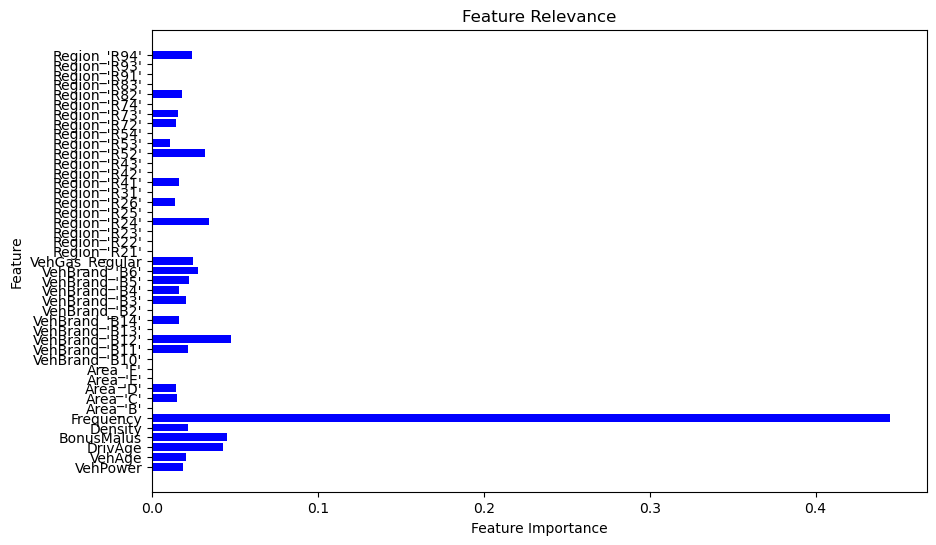

In [57]:
# Get feature names
feature_names = X.columns

# Get feature importances
feature_importances = best_estimator.feature_importances_

# Plot feature relevance
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), feature_importances, color='blue')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Relevance')
plt.show()


In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from pygam import PoissonGAM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

# Splitting the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

# Define hyperparameters grid for Poisson GAM
param_grid = {
    'lam': np.logspace(-3, 3, 4),  # Regularization parameter
    'max_iter': [100],  # Maximum number of iterations
    'tol': [1e-4],  # Tolerance for stopping criteria
}

# Initialize Poisson GAM model
gam_model = PoissonGAM()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gam_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train.values, y_train.values)

# Get the best estimator and its hyperparameters
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Extract coefficient and statistical significance
coefs = best_estimator.coef_
p_values = best_estimator.statistics_['p_values']

print("Coefficients of statistically significant features:")
for i, (coef, p_value) in enumerate(zip(coefs, p_values)):
    if p_value < 0.05:  # Check if p-value is less than 0.05
        print(f"Coefficient {i + 1}: {coef:.4f}, p-value: {p_value:.4f}")

# Predictions on the validation set
y_pred_val = best_estimator.predict(X_val.values)

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred_val)
medae_val = median_absolute_error(y_val, y_pred_val)
explained_var_val = explained_variance_score(y_val, y_pred_val)

print("\nValidation Error Metrics:")
print("Mean Absolute Error:", mae_val)
print("Mean Squared Error:", mse_val)
print("Root Mean Squared Error:", rmse_val)
print("R-squared:", r2_val)
print("Median Absolute Error:", medae_val)
print("Explained Variance Score:", explained_var_val)

# Predictions on the test set
y_pred_test = best_estimator.predict(X_test.values)

# Calculate evaluation metrics for test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)
explained_var_test = explained_variance_score(y_test, y_pred_test)

print("\nTesting Error Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r2_test)
print("Median Absolute Error:", medae_test)
print("Explained Variance Score:", explained_var_test)

# Predictions on the training set
y_pred_train = best_estimator.predict(X_train.values)

# Calculate evaluation metrics for training set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
medae_train = median_absolute_error(y_train, y_pred_train)
explained_var_train = explained_variance_score(y_train, y_pred_train)

print("\nTraining Error Metrics:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("R-squared:", r2_train)
print("Median Absolute Error:", medae_train)
print("Explained Variance Score:", explained_var_train)


Best Hyperparameters: {'lam': 0.001, 'max_iter': 100, 'tol': 0.0001}
Coefficients of statistically significant features:
Coefficient 6: 0.0314, p-value: 0.0000
Coefficient 11: 0.0297, p-value: 0.0000
Coefficient 44: -0.0035, p-value: 0.0000

Validation Error Metrics:
Mean Absolute Error: 0.7650308674995241
Mean Squared Error: 1.2531069099968315
Root Mean Squared Error: 1.1194225788310828
R-squared: 0.1746406932990191
Median Absolute Error: 0.4394983032998896
Explained Variance Score: 0.17466409391288307

Testing Error Metrics:
Mean Absolute Error: 0.7345776378346976
Mean Squared Error: 1.178431949782838
Root Mean Squared Error: 1.0855560555691437
R-squared: 0.19477294934115463
Median Absolute Error: 0.4265710722954448
Explained Variance Score: 0.19496761416300457

Training Error Metrics:
Mean Absolute Error: 0.7305361184040273
Mean Squared Error: 1.1796298596171377
Root Mean Squared Error: 1.0861076648367498
R-squared: 0.20904581026395297
Median Absolute Error: 0.4162043747611701
Expla

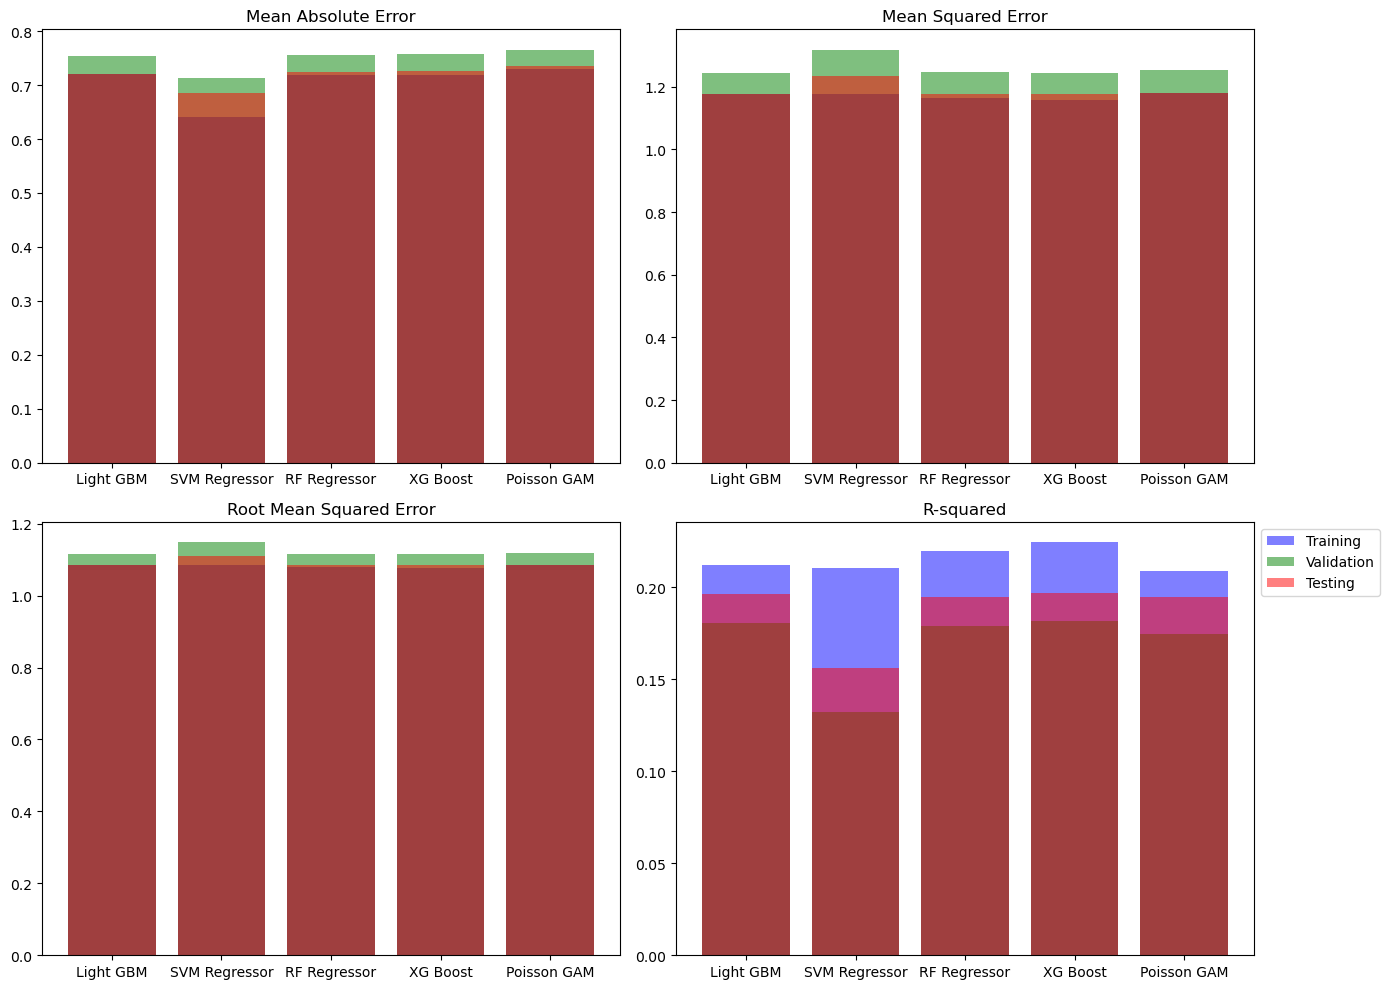

In [71]:
import matplotlib.pyplot as plt

# Error metrics for each classifier
classifiers = ['Light GBM', 'SVM Regressor', 'RF Regressor', 'XG Boost', 'Poisson GAM']

# Training error metrics
mae_train = [0.7200350987872024, 0.6410481392999942, 0.7188781242905219, 0.7193266943509673, 0.7305361184040273]
mse_train = [1.1753889551210708, 1.177413405996096, 1.1635253585323513, 1.1568172049961094, 1.1796298596171377]
rmse_train = [1.0841535662077908, 1.08508681956611, 1.0786683264712797, 1.0755543710087878, 1.0861076648367498]
r2_train = [0.2118893811960445, 0.21053196565721144, 0.21984404710305339, 0.22434193438661643, 0.20904581026395297]

# Validation error metrics
mae_val = [0.7541029043801328, 0.7127756426091028, 0.755597253603381, 0.7574218081371594, 0.7650308674995241]
mse_val = [1.243941033297969, 1.317234155021017, 1.246450908525542, 1.2427839626820705, 1.2531069099968315]
rmse_val = [1.1153210449453417, 1.1477082185908651, 1.116445658563614, 1.1148022078745945, 1.1194225788310828]
r2_val = [0.18067780120827082, 0.13240326082492992, 0.17902467100747976, 0.18143990617610983, 0.1746406932990191]

# Testing error metrics
mae_test = [0.7213166391860771, 0.6857159890817975, 0.7248806623847772, 0.7264895341516039, 0.7345776378346976]
mse_test = [1.1765326789959618, 1.2353262719248175, 1.1781311320584082, 1.175386633635018, 1.178431949782838]
rmse_test = [1.0846809111420566, 1.1114523255294477, 1.085417492054743, 1.0841524955627866, 1.0855560555691437]
r2_test = [0.1960707283214349, 0.15589684179327046, 0.19497849924081, 0.1968538254922847, 0.19477294934115463]

# Plotting error metrics
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Mean Absolute Error
axs[0, 0].bar(classifiers, mae_train, label='Training', color='b', alpha=0.5)
axs[0, 0].bar(classifiers, mae_val, label='Validation', color='g', alpha=0.5)
axs[0, 0].bar(classifiers, mae_test, label='Testing', color='r', alpha=0.5)
axs[0, 0].set_title('Mean Absolute Error')

# Mean Squared Error
axs[0, 1].bar(classifiers, mse_train, label='Training', color='b', alpha=0.5)
axs[0, 1].bar(classifiers, mse_val, label='Validation', color='g', alpha=0.5)
axs[0, 1].bar(classifiers, mse_test, label='Testing', color='r', alpha=0.5)
axs[0, 1].set_title('Mean Squared Error')

# Root Mean Squared Error
axs[1, 0].bar(classifiers, rmse_train, label='Training', color='b', alpha=0.5)
axs[1, 0].bar(classifiers, rmse_val, label='Validation', color='g', alpha=0.5)
axs[1, 0].bar(classifiers, rmse_test, label='Testing', color='r', alpha=0.5)
axs[1, 0].set_title('Root Mean Squared Error')

# R-squared
axs[1, 1].bar(classifiers, r2_train, label='Training', color='b', alpha=0.5)
axs[1, 1].bar(classifiers, r2_val, label='Validation', color='g', alpha=0.5)
axs[1, 1].bar(classifiers, r2_test, label='Testing', color='r', alpha=0.5)
axs[1, 1].set_title('R-squared')

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()
